In [69]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=c_id, client_secret=c_se))

In [399]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import json
from IPython.display import IFrame
import pprint
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score


In [71]:
url = "https://www.billboard.com/charts/hot-100/"

In [72]:
response = requests.get(url)

In [5]:
response.status_code 

200

b'<!DOCTYPE html>\n<!--[if IE 6]>\n<html id="ie6" lang="en-US">\n<![endif]-->\n<!--[if IE 7]>\n<html id="ie7" lang="en-US">\n<![endif]-->\n<!--[if IE 8]>\n<html id="ie8" lang="en-US">\n<![endif]-->\n<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->\n<html lang="en-US">\n<!--<![endif]-->\n<head>\n\t<meta charset="UTF-8"/>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t<meta name="theme-color" content="#ffffff">\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0"/>\t\n<!-- Add to home screen for iOS -->\n<meta name="apple-mobile-web-app-status-bar-style" content="black-translucent">\n<link rel="apple-touch-icon" sizes="180x180" href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png">\n\n<!-- Tile icons for Windows -->\n<meta name="msapplication-config" content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml">\n<meta name="msapplication-TileImage" c
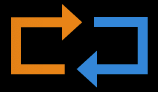

In [6]:
response.content

<!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-bil
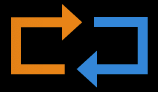

In [7]:
soup = BeautifulSoup(response.content, "html.parser")
soup

In [8]:
Song = soup.select("#title-of-a-story.c-title.a-no-trucate")
Song

[<h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">
 
 	
 	
 		
 					Last Night		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Search &amp; Rescue		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Flowers		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter

In [9]:
for i in Song:
    print(i.get_text("/", strip=True))


Last Night
Search & Rescue
Flowers
Kill Bill
Creepin'
Calm Down
Die For You
Boy's A Liar, Pt. 2
Anti-Hero
Ella Baila Sola
Rock And A Hard Place
Players
You Proof
Favorite Song
Sure Thing
Lavender Haze
La Bebe
As It Was
Thought You Should Know
Thinkin' Bout Me
I'm Good (Blue)
One Thing At A Time
Fast Car
Under The Influence
Something In The Orange
Escapism
Thank God
Slut Me Out
Unholy
Just Wanna Rock
Handle On You
Wait In The Truck
TQG
Snooze
Rich Flex
Heart Like A Truck
Dancin' In The Country
Superhero (Heroes & Villains)
Spin Bout U
Love You Anyway
Fight The Feeling
Eyes Closed
Until I Found You
Cuff It
Going, Going, Gone
Bloody Mary
Golden Hour
Next Thing You Know
PRC
Wild As Her
Por Las Noches
Like Crazy
AMG
Happy
Tennessee Orange
Ain't That Some
Everything I Love
Low Down
5 Leaf Clover
Cupid
Red Ruby Da Sleeze
Bebe Dame
I Wrote The Book
All Of The Girls You Loved Before
Cowgirls
Beso
Man Made A Bar
Nonsense
Dogtooth
Ch y La Pizza
Strike (Holster)
Yandel 150
Need A Favor
Special
ICU

In [10]:
Singer = soup.select("span.c-label.a-no-trucate")
Singer

[<span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet">
 	
 	Morgan Wallen
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Drake
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Miley Cyrus
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tab

In [12]:
for i in Singer:
    print(i.get_text("/", strip=True))


Morgan Wallen
Drake
Miley Cyrus
SZA
Metro Boomin, The Weeknd & 21 Savage
Rema & Selena Gomez
The Weeknd & Ariana Grande
PinkPantheress & Ice Spice
Taylor Swift
Eslabon Armado X Peso Pluma
Bailey Zimmerman
Coi Leray
Morgan Wallen
Toosii
Miguel
Taylor Swift
Yng Lvcas x Peso Pluma
Harry Styles
Morgan Wallen
Morgan Wallen
David Guetta & Bebe Rexha
Morgan Wallen
Luke Combs
Chris Brown
Zach Bryan
RAYE Featuring 070 Shake
Kane Brown With Katelyn Brown
NLE Choppa
Sam Smith & Kim Petras
Lil Uzi Vert
Parker McCollum
HARDY Featuring Lainey Wilson
Karol G x Shakira
SZA
Drake & 21 Savage
Lainey Wilson
Tyler Hubbard
Metro Boomin, Future & Chris Brown
Drake & 21 Savage
Luke Combs
Rod Wave
Ed Sheeran
Stephen Sanchez
Beyonce
Luke Combs
Lady Gaga
JVKE
Jordan Davis
Peso Pluma X Natanael Cano
Corey Kent
Peso Pluma
Jimin
Gabito Ballesteros, Peso Pluma & Natanael Cano
NF
Megan Moroney
Morgan Wallen
Morgan Wallen
Lil Baby
Luke Combs
Fifty Fifty
Nicki Minaj
Fuerza Regida X Grupo Frontera
Morgan Wallen
Taylor 

In [13]:
Singer = []
Song = []

In [14]:
num_iter = len(soup.select("#title-of-a-story.c-title.a-no-trucate"))

In [18]:
for i in range(num_iter):
    Singer.append(soup.select("span.c-label.a-no-trucate")[i].get_text().strip())
    Song.append(soup.select("#title-of-a-story.c-title.a-no-trucate")[i].get_text().strip())

In [19]:
Billboard_Hot = pd.DataFrame({"Singer": Singer,
                              "Song" : Song
                              })
            
                                  
Billboard_Hot.head(100)

Singer               Song
0                                      Morgan Wallen         Last Night
1                                              Drake    Search & Rescue
2                                        Miley Cyrus            Flowers
3                                                SZA          Kill Bill
4               Metro Boomin, The Weeknd & 21 Savage           Creepin'
..                                               ...                ...
95                                      Old Dominion        Memory Lane
96                                      Carly Pearce  What He Didn't Do
97                       Carin Leon X Grupo Frontera        Que Vuelvas
98  YoungBoy Never Broke Again Featuring Nicki Minaj                WTF
99                                     Morgan Wallen         '98 Braves

[100 rows x 2 columns]

In [57]:
from fuzzywuzzy import fuzz

In [687]:
#Checking if the user inputs a song that exist or not.

value = input("Enter a song: ")
is_in_Billboard_Hot = value in Billboard_Hot.values
if is_in_Billboard_Hot:
    print(f"The song '{value}' is in the hot list.")
else:
    print(f"Sorry,'{value}' is not in the hot list.")


Enter a song: Last Night
The song 'Last Night' is in the hot list.


In [688]:
# If the song is in the Hot list, recommend another hot song.
Billboard_Hot['Song'].sample()


79    Trance
Name: Song, dtype: object

In [686]:
# How do we deal with typos?

if is_in_Billboard_Hot:
     print(f"The song '{value}' is in the hot list.")
else:
    similarities = [fuzz.ratio(value, x) for x in Billboard_Hot['Song']]
    most_similar_index = similarities.index(max(similarities))
    most_similar_value = Billboard_Hot.loc[most_similar_index, 'Song']
    print(f"Sorry,'{value}' is not in the hot list. Did you mean '{most_similar_value}'.")

Sorry,'l4stn8' is not in the hot list. Did you mean 'Nasty'.


In [480]:
# What do we do with songs that have the same name, but a different artist?



### Starting with Spotify API

In [78]:
results = sp.search(q="deep jungle walk",limit=3,market="GB")
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=deep+jungle+walk&type=track&market=GB&offset=0&limit=3',
  'items': [{'album': {'album_group': 'album',
     'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3dUltShd2gJQc98Kc7Syit'},
       'href': 'https://api.spotify.com/v1/artists/3dUltShd2gJQc98Kc7Syit',
       'id': '3dUltShd2gJQc98Kc7Syit',
       'name': 'Astrix',
       'type': 'artist',
       'uri': 'spotify:artist:3dUltShd2gJQc98Kc7Syit'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/0jvgFRnKjvXgK0p4pPSi4Z'},
     'href': 'https://api.spotify.com/v1/albums/0jvgFRnKjvXgK0p4pPSi4Z',
     'id': '0jvgFRnKjvXgK0p4pPSi4Z',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b27331b0f8c9ee642bbb120ee3fd',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e0231b0f8c9ee642bbb120ee3fd',
       'width': 300},
      {'height'

In [80]:
pprint.pprint(results)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=deep+jungle+walk&type=track&market=GB&offset=0&limit=3',
            'items': [{'album': {'album_group': 'album',
                                 'album_type': 'album',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3dUltShd2gJQc98Kc7Syit'},
                                              'href': 'https://api.spotify.com/v1/artists/3dUltShd2gJQc98Kc7Syit',
                                              'id': '3dUltShd2gJQc98Kc7Syit',
                                              'name': 'Astrix',
                                              'type': 'artist',
                                              'uri': 'spotify:artist:3dUltShd2gJQc98Kc7Syit'}],
                                 'external_urls': {'spotify': 'https://open.spotify.com/album/0jvgFRnKjvXgK0p4pPSi4Z'},
                                 'href': 'https://api.spotify.com/v1/albums/0jvgFRnKjvXgK0p4pPSi4Z

In [85]:
results["tracks"]["items"][0]['album']['artists'][0]["id"]

'3dUltShd2gJQc98Kc7Syit'

In [86]:
track_id=results["tracks"]["items"][0]["id"]
track_id

'5gXKDmafOQ8i4lYr62wxTk'

### Embeded track player

In [87]:
IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [88]:
results.keys()  ## navigating dictionary

dict_keys(['tracks'])

In [89]:
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=deep+jungle+walk&type=track&market=GB&offset=0&limit=3',
  'items': [{'album': {'album_group': 'album',
     'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3dUltShd2gJQc98Kc7Syit'},
       'href': 'https://api.spotify.com/v1/artists/3dUltShd2gJQc98Kc7Syit',
       'id': '3dUltShd2gJQc98Kc7Syit',
       'name': 'Astrix',
       'type': 'artist',
       'uri': 'spotify:artist:3dUltShd2gJQc98Kc7Syit'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/0jvgFRnKjvXgK0p4pPSi4Z'},
     'href': 'https://api.spotify.com/v1/albums/0jvgFRnKjvXgK0p4pPSi4Z',
     'id': '0jvgFRnKjvXgK0p4pPSi4Z',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b27331b0f8c9ee642bbb120ee3fd',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e0231b0f8c9ee642bbb120ee3fd',
       'width': 300},
      {'height'

In [90]:
results['tracks']["items"][0].keys()

dict_keys(['album', 'artists', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'is_playable', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [91]:
pprint.pprint(results) ## more readble


{'tracks': {'href': 'https://api.spotify.com/v1/search?query=deep+jungle+walk&type=track&market=GB&offset=0&limit=3',
            'items': [{'album': {'album_group': 'album',
                                 'album_type': 'album',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3dUltShd2gJQc98Kc7Syit'},
                                              'href': 'https://api.spotify.com/v1/artists/3dUltShd2gJQc98Kc7Syit',
                                              'id': '3dUltShd2gJQc98Kc7Syit',
                                              'name': 'Astrix',
                                              'type': 'artist',
                                              'uri': 'spotify:artist:3dUltShd2gJQc98Kc7Syit'}],
                                 'external_urls': {'spotify': 'https://open.spotify.com/album/0jvgFRnKjvXgK0p4pPSi4Z'},
                                 'href': 'https://api.spotify.com/v1/albums/0jvgFRnKjvXgK0p4pPSi4Z

In [92]:
len(results['tracks']['items'])

3

### getting the track id

In [93]:
results['tracks']['items'][0].keys()

dict_keys(['album', 'artists', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'is_playable', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [94]:
for item in results['tracks']['items']:
    print("The name of song is: '{}' and the id is: {}".format(item['name'],item["id"]))

The name of song is: 'Deep Jungle Walk' and the id is: 5gXKDmafOQ8i4lYr62wxTk
The name of song is: 'Deep Jungle Walk' and the id is: 55BXOdS351qNfBDhya7Uta
The name of song is: 'Jungle' and the id is: 5WmxjhGcmCKSFmRefcJUIt


In [110]:
song = sp.search(q="deep jungle walk", limit=20,market="GB") 
song

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=deep+jungle+walk&type=track&market=GB&offset=0&limit=20',
  'items': [{'album': {'album_group': 'album',
     'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3dUltShd2gJQc98Kc7Syit'},
       'href': 'https://api.spotify.com/v1/artists/3dUltShd2gJQc98Kc7Syit',
       'id': '3dUltShd2gJQc98Kc7Syit',
       'name': 'Astrix',
       'type': 'artist',
       'uri': 'spotify:artist:3dUltShd2gJQc98Kc7Syit'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/0jvgFRnKjvXgK0p4pPSi4Z'},
     'href': 'https://api.spotify.com/v1/albums/0jvgFRnKjvXgK0p4pPSi4Z',
     'id': '0jvgFRnKjvXgK0p4pPSi4Z',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b27331b0f8c9ee642bbb120ee3fd',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e0231b0f8c9ee642bbb120ee3fd',
       'width': 300},
      {'height

In [97]:
song["tracks"]["items"][2]

{'album': {'album_group': 'album',
  'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3NPpFNZtSTHheNBaWC82rB'},
    'href': 'https://api.spotify.com/v1/artists/3NPpFNZtSTHheNBaWC82rB',
    'id': '3NPpFNZtSTHheNBaWC82rB',
    'name': 'X Ambassadors',
    'type': 'artist',
    'uri': 'spotify:artist:3NPpFNZtSTHheNBaWC82rB'}],
  'external_urls': {'spotify': 'https://open.spotify.com/album/5MEgrjkStq0JsQGO64Xvlq'},
  'href': 'https://api.spotify.com/v1/albums/5MEgrjkStq0JsQGO64Xvlq',
  'id': '5MEgrjkStq0JsQGO64Xvlq',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b273555f12037889f4b332cce41b',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e02555f12037889f4b332cce41b',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d00004851555f12037889f4b332cce41b',
    'width': 64}],
  'is_playable': True,
  'name': 'VHS',
  'release_date': '2015-06-30'

In [98]:
song["tracks"]["items"][0]["uri"]

'spotify:track:5gXKDmafOQ8i4lYr62wxTk'

## building Data frame of audio features

In [288]:
sp.audio_features(results["tracks"]["items"][0]["id"] )

[{'danceability': 0.309,
  'energy': 0.629,
  'key': 9,
  'loudness': -7.6,
  'mode': 0,
  'speechiness': 0.0305,
  'acousticness': 0.756,
  'instrumentalness': 0.0125,
  'liveness': 0.402,
  'valence': 0.809,
  'tempo': 92.055,
  'type': 'audio_features',
  'id': '0IZLIinUJUYHgd8mgirtFF',
  'uri': 'spotify:track:0IZLIinUJUYHgd8mgirtFF',
  'track_href': 'https://api.spotify.com/v1/tracks/0IZLIinUJUYHgd8mgirtFF',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0IZLIinUJUYHgd8mgirtFF',
  'duration_ms': 169000,
  'time_signature': 4}]

In [111]:
list_of_songs=[]
for index in range(0,len(song["tracks"]["items"])):
    list_of_songs.append(sp.audio_features(song["tracks"]["items"][index]["uri"])[0])
df=pd.DataFrame(list_of_songs)    
df=df[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df

danceability  energy  loudness  speechiness  acousticness  \
0          0.618   0.885    -8.347       0.0454      0.000658   
1          0.595   0.895    -8.196       0.0502      0.001020   
2          0.389   0.748    -4.461       0.0805      0.000821   
3          0.255   0.314   -27.545       0.0862      0.009920   
4          0.754   0.345   -16.693       0.1270      0.373000   
5          0.255   0.314   -27.545       0.0862      0.009920   
6          0.400   0.134   -10.981       0.0436      0.986000   
7          0.172   0.998   -26.711       0.0372      0.003090   
8          0.471   0.993   -24.278       0.0393      0.250000   
9          0.194   0.718   -16.079       0.0889      0.006380   
10         0.613   0.962    -3.212       0.2990      0.013300   
11         0.595   0.895    -8.196       0.0502      0.001020   
12         0.407   0.868    -5.556       0.0926      0.000086   
13         0.836   0.159   -13.149       0.0550      0.948000   
14         0.617   0.893    -8.041       0.0471      0.000557   
15         0.168   0.199   -46.887       0.0551      0.271000   
16         0.618   0.885    -8.347       0.0454      0.000658   
17         0.379   0.760    -4.319       0.0848      0.001040   
18         0.242   0.291   -18.529       0.0479      0.574000   
19         0.270   0.606   -24.472       0.0432      0.010900   

    instrumentalness  liveness  valence    tempo                      id  \
0           0.502000    0.3700  0.10500  138.029  5gXKDmafOQ8i4lYr62wxTk   
1           0.601000    0.4680  0.06690  138.012  55BXOdS351qNfBDhya7Uta   
2           0.000580    0.3580  0.21600   78.056  5WmxjhGcmCKSFmRefcJUIt   
3           0.967000    0.2270  0.04730   88.538  4SeedpeiisPCFcSESm8nGx   
4           0.915000    0.1110  0.08010  100.026  4IglZiG3IWNCHmDHCc9jEx   
5           0.967000    0.2270  0.04730   88.538  12sqiQ7DazKuEF8lggwFc9   
6           0.698000    0.0946  0.23200   76.776  0DWZCp57PV6TPAxHf0hQYZ   
7           0.905000    0.5890  0.00001   84.096  4ouxjL4Ejc89NoCE665kHI   
8           0.945000    0.9300  0.00971   46.684  3g9tyeJbq5oqfzsA6IlTOk   
9           0.970000    0.5280  0.03510   64.379  2McAkThAEOTcwMogxF3bdT   
10          0.011800    0.2010  0.69300  175.084  4qhX1YcScEgNYv0OMi4JGy   
11          0.601000    0.4680  0.06690  138.012  007QsPVgGoKAu6sJfLMwQR   
12          0.205000    0.3690  0.11000   77.968  6dAIC2Hqes5KXEap8ADXEo   
13          0.715000    0.1030  0.56900  114.956  5DyA0RbdMgWD2lbe4ByoXG   
14          0.448000    0.3700  0.09480  138.006  27qc1wi5hLqnj8ktjRUt7i   
15          0.697000    0.5680  0.01670  114.630  5Fb4yp6Pbw2XOawVYTgbIl   
16          0.502000    0.3700  0.10500  138.029  1xCkdpGb30iVO4cH97CEzC   
17          0.000515    0.3830  0.23100   78.043  406ZdY9JkmSy7kOGuVflrL   
18          0.090500    0.0953  0.03970  124.777  7GppqYvBXGa85AbftozhUC   
19          0.806000    0.3640  0.03230  110.805  1Xt87jhYuJ02uDliE9qhnk   

    duration_ms  
0        555705  
1        250792  
2        189707  
3         90000  
4        126288  
5         90000  
6        132202  
7        150000  
8        102209  
9         90000  
10       319543  
11       250792  
12       274280  
13       153772  
14       555705  
15       312000  
16       555705  
17       189320  
18       240247  
19       208000

## Function

##### Get all tracks in the playlist , Get audio features for all tracks , Create a DataFrame of the audio features

In [303]:
def get_playlist_audio_features(username, playlist_id):
  
    results = sp.user_playlist_tracks(username, playlist_id, market="GE")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])

  
    list_of_audio_features = []
    for track in tracks:
        audio_features = sp.audio_features(track['track']['id'])
        if audio_features is not None:
            list_of_audio_features.append(audio_features[0])


    df = pd.DataFrame(list_of_audio_features)
    df = df[["danceability", "energy", "loudness", "speechiness", "acousticness", 
             "instrumentalness", "liveness", "valence", "tempo", "id", "duration_ms"]]

    return df

In [398]:
df1 = get_playlist_audio_features('spotify', '0RKKYGTy7VndIdV8tyCROP')

In [397]:
df2 = get_playlist_audio_features('spotify', '37i9dQZF1DX1htCFhfVtyK')

In [308]:
df3 = get_playlist_audio_features('spotify', '3RcRK9HGTAm9eLW1LepWKZ')

In [309]:
df4 = get_playlist_audio_features('spotify', '5DZ93TH6ABgWYRgdBNJs8O')

In [310]:
df5 = get_playlist_audio_features('spotify', '37i9dQZF1DX48TTZL62Yht')

In [311]:
df6 = get_playlist_audio_features('spotify', '37i9dQZF1DWSWyJydK4fTU')

In [312]:
df7 = get_playlist_audio_features('spotify', '37i9dQZF1DWX7rdRjOECPW')

In [313]:
df8 = get_playlist_audio_features('spotify', '37i9dQZF1DX8ttEdg9VJHO')

In [319]:
df9 = get_playlist_audio_features('spotify', '2jJ810j7t6FfIaW8iGQ9Mw')

In [320]:
df10 = get_playlist_audio_features('spotify', '6P8MBHnjmh01H79iZebDhg')

In [321]:
df11 =get_playlist_audio_features('spotify', '5dG0pvufNWUhSg0pCXKzmd')

In [322]:
df12 = get_playlist_audio_features('spotify', '0Qx8Uy20qIchPVbikmEDjC')

In [323]:
df13 = get_playlist_audio_features('spotify', '0Dlo7I96IdfAYSittZFsVD')

In [328]:
df14 = get_playlist_audio_features('spotify', '4Fg3afSe92vVcgesOqgZHB')

In [329]:
df15 = get_playlist_audio_features('spotify', '1nDsNOExryJLNaDifrx4oH')

In [330]:
df16 = get_playlist_audio_features('spotify', '1n2nErzwQhOqyRScbKishV')

In [331]:
df17 =  get_playlist_audio_features('spotify', '6FnL2kfi8WvIx1VJt1bcw3')

In [340]:
df19 = get_playlist_audio_features('spotify', '5gPGaSOaDP1PtpPsDufGVM')

In [341]:
df20 = get_playlist_audio_features('spotify', '7AX99lh3Q4qer3evzc7ZmR')

In [342]:
df21 = get_playlist_audio_features('spotify', '4VAUrlJS99CrTdcD6SRGCu')

In [343]:
df22 = get_playlist_audio_features('spotify', '2J5Zjca5AciiBEiH8jlvH8')

In [344]:
df23 = get_playlist_audio_features('spotify', '1lsX4C8blz32tsHVIIkaJJ')

In [345]:
df24 = get_playlist_audio_features('spotify', '2H2bEKAWeQtNUumhZxbQwj')

In [351]:
df25 = get_playlist_audio_features('spotify', '0R9yCy46jAUPzf7xqQ2DOH')

In [352]:
df26 = get_playlist_audio_features('spotify', '4Bidv2whPvKifzfu4A1muI')

In [357]:
df27 = get_playlist_audio_features('spotify', '5IbMiT6FkLcWezy9Y88nhm')

In [358]:
df28 = get_playlist_audio_features('spotify', '3SJCWF4ANaA6rq7izC8Cz2')

In [381]:
df29 = get_playlist_audio_features('spotify', '37i9dQZF1DX4o1oenSJRJd')

In [380]:
df30 = get_playlist_audio_features('spotify', '00id0bLyeoFdqIaln0YYzz')

In [379]:
df31 = get_playlist_audio_features('spotify', '3fIBuQ5GNnoymjN4EiMI86')


In [394]:
combined_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df19, df31, df30, df29, df28, df27, df26, df25, df24, df23, df22,df21,df20], axis=0)

In [395]:
combined_data

danceability  energy  loudness  speechiness  acousticness  \
0          0.831   0.735    -6.254       0.0384       0.00397   
1          0.755   0.884    -5.296       0.0638       0.02080   
2          0.565   0.864    -5.821       0.1770       0.04570   
3          0.917   0.692   -11.665       0.2440       0.18500   
4          0.500   0.501    -8.284       0.0376       0.46200   
..           ...     ...       ...          ...           ...   
67         0.669   0.784    -5.603       0.1120       0.19400   
68         0.663   0.606    -7.567       0.2890       0.48900   
69         0.375   0.133   -10.624       0.0352       0.65100   
70         0.762   0.481   -11.057       0.2340       0.51900   
71         0.720   0.741    -6.529       0.0287       0.10100   

    instrumentalness  liveness  valence    tempo                      id  \
0           0.020500    0.1230    0.970  122.979  5EYdTPdJD74r9EVZBztqGG   
1           0.000003    0.2480    0.897  121.927  7wdzLe2Gsx1RGqbvYZHASz   
2           0.000149    0.6870    0.584  156.406  07Vvsu4HGrXmD6jAXWE4CK   
3           0.000011    0.0686    0.819  111.782  0tm6gsXe0LSm9zeSspyMQu   
4           0.000000    0.2600    0.623  144.438  0cGG2EouYCEEC3xfa0tDFV   
..               ...       ...      ...      ...                     ...   
67          0.000006    0.1150    0.517  125.993  5YaskwnGDZFDRipaqzbwQx   
68          0.000079    0.1360    0.322  100.409  54Nw1AXqAqTceSNYbRPMOM   
69          0.000000    0.0695    0.192  131.721  6LtHYDgYHRCHoKK3snfr2w   
70          0.015400    0.1240    0.317  108.989  6wqv1yeDe2wlPmQEM5ZCYb   
71          0.000014    0.2890    0.357  119.896  6WkJ2OK163XXS2oARUC9JM   

    duration_ms  
0        260507  
1        231933  
2        210773  
3        235840  
4        153800  
..          ...  
67       150053  
68       171472  
69       187944  
70       196162  
71       198053  

[3632 rows x 11 columns]

In [396]:
combined_data.drop_duplicates()

danceability  energy  loudness  speechiness  acousticness  \
0          0.831   0.735    -6.254       0.0384       0.00397   
1          0.755   0.884    -5.296       0.0638       0.02080   
2          0.565   0.864    -5.821       0.1770       0.04570   
3          0.917   0.692   -11.665       0.2440       0.18500   
4          0.500   0.501    -8.284       0.0376       0.46200   
..           ...     ...       ...          ...           ...   
67         0.669   0.784    -5.603       0.1120       0.19400   
68         0.663   0.606    -7.567       0.2890       0.48900   
69         0.375   0.133   -10.624       0.0352       0.65100   
70         0.762   0.481   -11.057       0.2340       0.51900   
71         0.720   0.741    -6.529       0.0287       0.10100   

    instrumentalness  liveness  valence    tempo                      id  \
0           0.020500    0.1230    0.970  122.979  5EYdTPdJD74r9EVZBztqGG   
1           0.000003    0.2480    0.897  121.927  7wdzLe2Gsx1RGqbvYZHASz   
2           0.000149    0.6870    0.584  156.406  07Vvsu4HGrXmD6jAXWE4CK   
3           0.000011    0.0686    0.819  111.782  0tm6gsXe0LSm9zeSspyMQu   
4           0.000000    0.2600    0.623  144.438  0cGG2EouYCEEC3xfa0tDFV   
..               ...       ...      ...      ...                     ...   
67          0.000006    0.1150    0.517  125.993  5YaskwnGDZFDRipaqzbwQx   
68          0.000079    0.1360    0.322  100.409  54Nw1AXqAqTceSNYbRPMOM   
69          0.000000    0.0695    0.192  131.721  6LtHYDgYHRCHoKK3snfr2w   
70          0.015400    0.1240    0.317  108.989  6wqv1yeDe2wlPmQEM5ZCYb   
71          0.000014    0.2890    0.357  119.896  6WkJ2OK163XXS2oARUC9JM   

    duration_ms  
0        260507  
1        231933  
2        210773  
3        235840  
4        153800  
..          ...  
67       150053  
68       171472  
69       187944  
70       196162  
71       198053  

[2980 rows x 11 columns]

In [407]:
combined_data_copy = combined_data.copy() #copied the dataframe to drop the id column

In [442]:
finaldf = combined_data_copy.drop_duplicates()
finaldf

danceability  energy  loudness  speechiness  acousticness  \
0          0.831   0.735    -6.254       0.0384       0.00397   
1          0.755   0.884    -5.296       0.0638       0.02080   
2          0.565   0.864    -5.821       0.1770       0.04570   
3          0.917   0.692   -11.665       0.2440       0.18500   
4          0.500   0.501    -8.284       0.0376       0.46200   
..           ...     ...       ...          ...           ...   
67         0.669   0.784    -5.603       0.1120       0.19400   
68         0.663   0.606    -7.567       0.2890       0.48900   
69         0.375   0.133   -10.624       0.0352       0.65100   
70         0.762   0.481   -11.057       0.2340       0.51900   
71         0.720   0.741    -6.529       0.0287       0.10100   

    instrumentalness  liveness  valence    tempo                      id  \
0           0.020500    0.1230    0.970  122.979  5EYdTPdJD74r9EVZBztqGG   
1           0.000003    0.2480    0.897  121.927  7wdzLe2Gsx1RGqbvYZHASz   
2           0.000149    0.6870    0.584  156.406  07Vvsu4HGrXmD6jAXWE4CK   
3           0.000011    0.0686    0.819  111.782  0tm6gsXe0LSm9zeSspyMQu   
4           0.000000    0.2600    0.623  144.438  0cGG2EouYCEEC3xfa0tDFV   
..               ...       ...      ...      ...                     ...   
67          0.000006    0.1150    0.517  125.993  5YaskwnGDZFDRipaqzbwQx   
68          0.000079    0.1360    0.322  100.409  54Nw1AXqAqTceSNYbRPMOM   
69          0.000000    0.0695    0.192  131.721  6LtHYDgYHRCHoKK3snfr2w   
70          0.015400    0.1240    0.317  108.989  6wqv1yeDe2wlPmQEM5ZCYb   
71          0.000014    0.2890    0.357  119.896  6WkJ2OK163XXS2oARUC9JM   

    duration_ms  
0        260507  
1        231933  
2        210773  
3        235840  
4        153800  
..          ...  
67       150053  
68       171472  
69       187944  
70       196162  
71       198053  

[2980 rows x 11 columns]

In [443]:
finaldf2 = finaldf.drop(['id'], axis=1)  #dropped the column id to make the scaling
finaldf2

danceability  energy  loudness  speechiness  acousticness  \
0          0.831   0.735    -6.254       0.0384       0.00397   
1          0.755   0.884    -5.296       0.0638       0.02080   
2          0.565   0.864    -5.821       0.1770       0.04570   
3          0.917   0.692   -11.665       0.2440       0.18500   
4          0.500   0.501    -8.284       0.0376       0.46200   
..           ...     ...       ...          ...           ...   
67         0.669   0.784    -5.603       0.1120       0.19400   
68         0.663   0.606    -7.567       0.2890       0.48900   
69         0.375   0.133   -10.624       0.0352       0.65100   
70         0.762   0.481   -11.057       0.2340       0.51900   
71         0.720   0.741    -6.529       0.0287       0.10100   

    instrumentalness  liveness  valence    tempo  duration_ms  
0           0.020500    0.1230    0.970  122.979       260507  
1           0.000003    0.2480    0.897  121.927       231933  
2           0.000149    0.6870    0.584  156.406       210773  
3           0.000011    0.0686    0.819  111.782       235840  
4           0.000000    0.2600    0.623  144.438       153800  
..               ...       ...      ...      ...          ...  
67          0.000006    0.1150    0.517  125.993       150053  
68          0.000079    0.1360    0.322  100.409       171472  
69          0.000000    0.0695    0.192  131.721       187944  
70          0.015400    0.1240    0.317  108.989       196162  
71          0.000014    0.2890    0.357  119.896       198053  

[2980 rows x 10 columns]

### Scaling => Fit & Transfrom

In [444]:
scaler = StandardScaler()
scaler.fit(finaldf2)
finaldf2_scaled = scaler.transform(finaldf2)
finaldf2_scaled_df = pd.DataFrame(finaldf2_scaled, columns = finaldf2.columns)
display(finaldf2.head())
print()
display(finaldf2_scaled_df.head())

danceability  energy  loudness  speechiness  acousticness  \
0         0.831   0.735    -6.254       0.0384       0.00397   
1         0.755   0.884    -5.296       0.0638       0.02080   
2         0.565   0.864    -5.821       0.1770       0.04570   
3         0.917   0.692   -11.665       0.2440       0.18500   
4         0.500   0.501    -8.284       0.0376       0.46200   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.020500    0.1230    0.970  122.979       260507  
1          0.000003    0.2480    0.897  121.927       231933  
2          0.000149    0.6870    0.584  156.406       210773  
3          0.000011    0.0686    0.819  111.782       235840  
4          0.000000    0.2600    0.623  144.438       153800

danceability    energy  loudness  speechiness  acousticness  \
0      1.154511  0.362699  0.285108    -0.630914     -0.932126   
1      0.583389  1.246846  0.628804    -0.364376     -0.860756   
2     -0.844419  1.128168  0.440453     0.823501     -0.755165   
3      1.800782  0.107542 -1.656166     1.526574     -0.164445   
4     -1.332879 -1.025827 -0.443184    -0.639309      1.010209   

   instrumentalness  liveness   valence     tempo  duration_ms  
0         -0.222829 -0.376264  1.749109  0.048530     0.333469  
1         -0.324205  0.566556  1.443626  0.009332    -0.077383  
2         -0.323482  3.877740  0.133815  1.294022    -0.381634  
3         -0.324165 -0.786579  1.117219 -0.368671    -0.021206  
4         -0.324219  0.657067  0.297019  0.848093    -1.200823

### Looking for K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

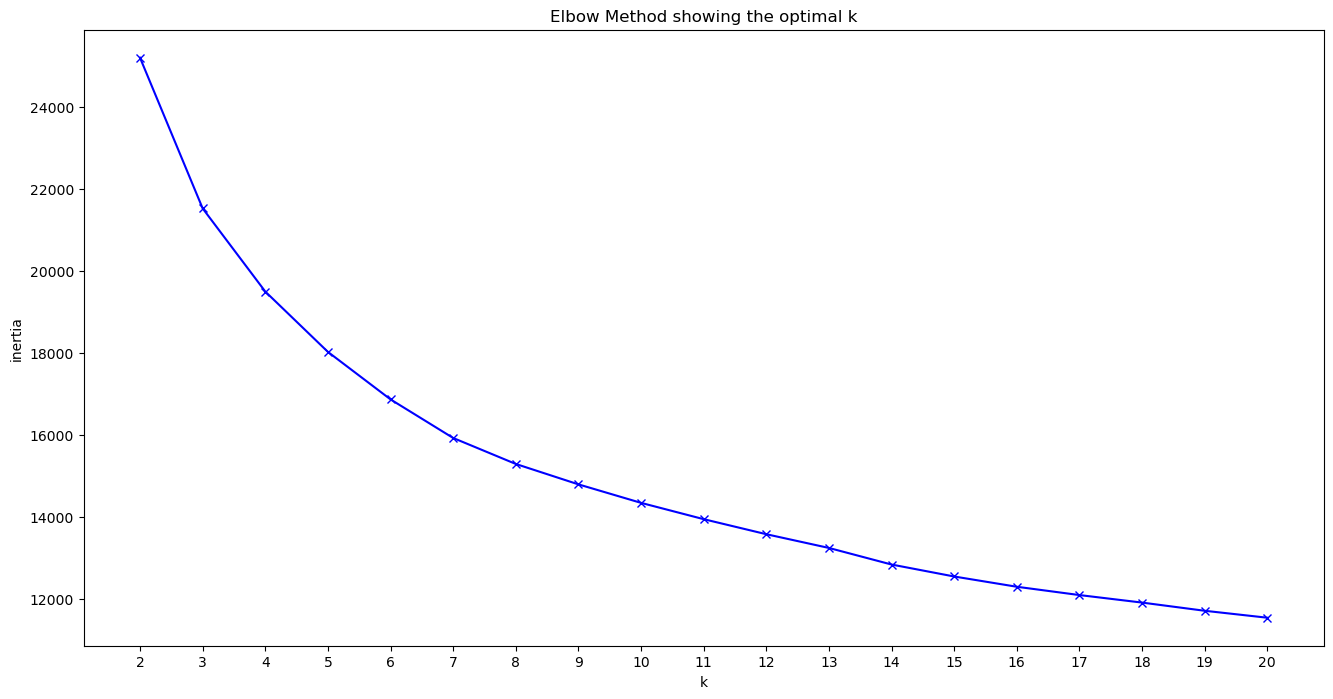

In [490]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(finaldf2_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Creating cluster column

In [594]:
kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(finaldf2_scaled_df)

KMeans(n_clusters=10, random_state=1234)

In [595]:
kmeans.labels_

array([1, 1, 6, ..., 5, 5, 4], dtype=int32)

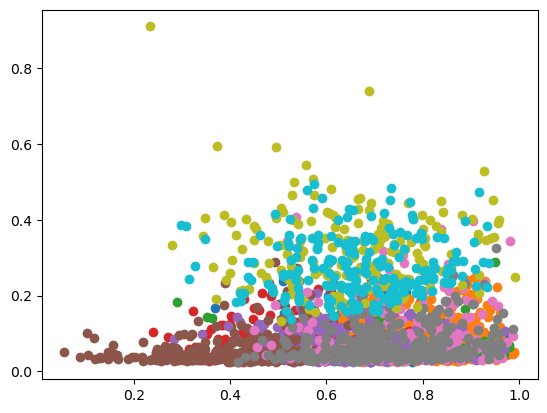

In [596]:
# assign a cluster to each example
labels = kmeans.predict(finaldf2_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(finaldf2.to_numpy()[row_ix, 1], finaldf2.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [494]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [495]:
clusters = kmeans.predict(finaldf2_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    275
1    702
2    192
3    192
4    450
5    320
6    181
7    271
8    183
9    214
dtype: int64

In [496]:
clusters

array([1, 1, 6, ..., 5, 5, 4], dtype=int32)

In [497]:
finaldf2["cluster"] = clusters
finaldf2

danceability  energy  loudness  speechiness  acousticness  \
0          0.831   0.735    -6.254       0.0384       0.00397   
1          0.755   0.884    -5.296       0.0638       0.02080   
2          0.565   0.864    -5.821       0.1770       0.04570   
3          0.917   0.692   -11.665       0.2440       0.18500   
4          0.500   0.501    -8.284       0.0376       0.46200   
..           ...     ...       ...          ...           ...   
67         0.669   0.784    -5.603       0.1120       0.19400   
68         0.663   0.606    -7.567       0.2890       0.48900   
69         0.375   0.133   -10.624       0.0352       0.65100   
70         0.762   0.481   -11.057       0.2340       0.51900   
71         0.720   0.741    -6.529       0.0287       0.10100   

    instrumentalness  liveness  valence    tempo  duration_ms  cluster  
0           0.020500    0.1230    0.970  122.979       260507        1  
1           0.000003    0.2480    0.897  121.927       231933        1  
2           0.000149    0.6870    0.584  156.406       210773        6  
3           0.000011    0.0686    0.819  111.782       235840        3  
4           0.000000    0.2600    0.623  144.438       153800        5  
..               ...       ...      ...      ...          ...      ...  
67          0.000006    0.1150    0.517  125.993       150053        1  
68          0.000079    0.1360    0.322  100.409       171472        9  
69          0.000000    0.0695    0.192  131.721       187944        5  
70          0.015400    0.1240    0.317  108.989       196162        5  
71          0.000014    0.2890    0.357  119.896       198053        4  

[2980 rows x 11 columns]

In [525]:
finaldf2[finaldf2['cluster'] == 3].sample()

danceability  energy  loudness  speechiness  acousticness  \
80         0.837    0.54   -10.331       0.0433        0.0643   

    instrumentalness  liveness  valence    tempo  duration_ms  cluster  
80               0.0     0.192    0.535  135.977       222987        3

### Silouhette Method

In [516]:
from sklearn.metrics import silhouette_score

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

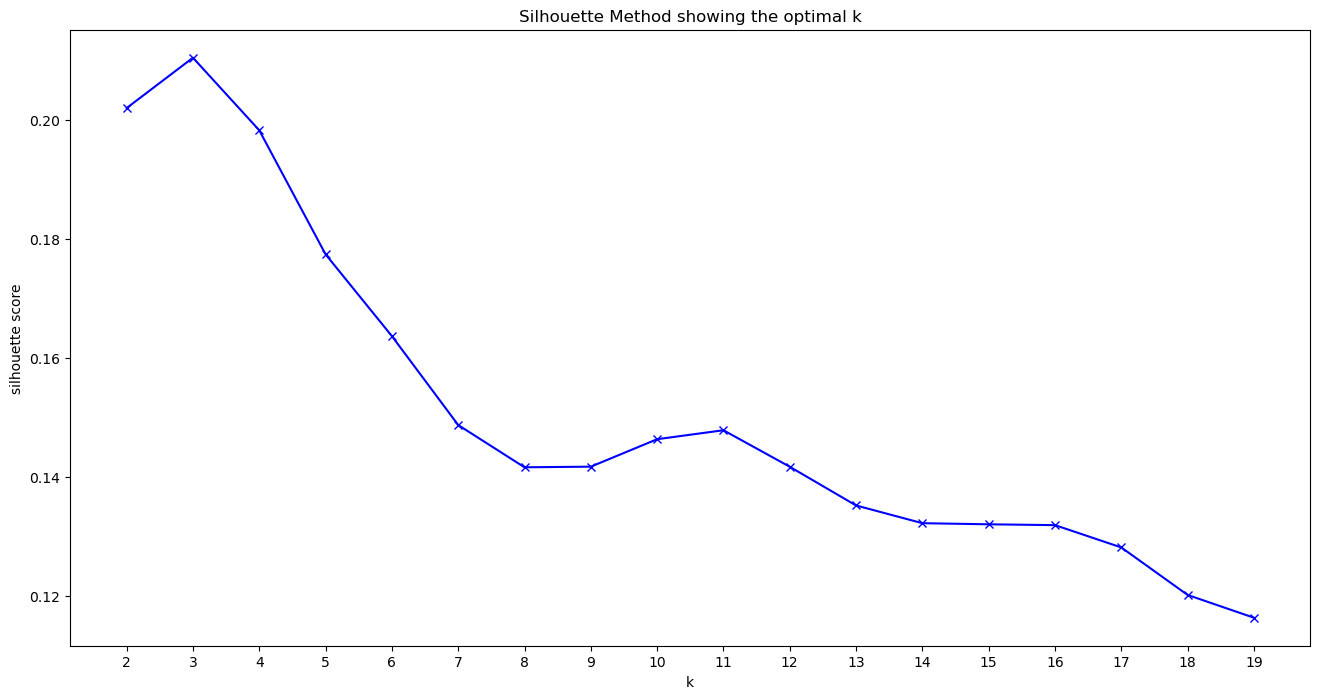

In [519]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1000)
    kmeans.fit(finaldf2_scaled_df)
    
    filename = "model.ipynb" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(finaldf2_scaled_df, kmeans.predict(finaldf2_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

### Get audio features

In [527]:
song = input('please enter a song')

please enter a songhello


In [532]:
song_json = sp.search(q=song,limit=3,market="GE")

In [533]:
song_json['tracks']['items'][0]['uri']

'spotify:track:1Yk0cQdMLx5RzzFTYwmuld'

In [542]:
a = sp.audio_features("1Yk0cQdMLx5RzzFTYwmuld")
a

[{'danceability': 0.578,
  'energy': 0.43,
  'key': 5,
  'loudness': -6.134,
  'mode': 0,
  'speechiness': 0.0305,
  'acousticness': 0.33,
  'instrumentalness': 0,
  'liveness': 0.0854,
  'valence': 0.288,
  'tempo': 78.991,
  'type': 'audio_features',
  'id': '1Yk0cQdMLx5RzzFTYwmuld',
  'uri': 'spotify:track:1Yk0cQdMLx5RzzFTYwmuld',
  'track_href': 'https://api.spotify.com/v1/tracks/1Yk0cQdMLx5RzzFTYwmuld',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1Yk0cQdMLx5RzzFTYwmuld',
  'duration_ms': 295502,
  'time_signature': 4}]

In [545]:
'a' == a

False

In [569]:
a_dataframe = pd.DataFrame(a)
a_dataframe

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.578    0.43    5    -6.134     0       0.0305          0.33   

   instrumentalness  liveness  valence   tempo            type  \
0                 0    0.0854    0.288  78.991  audio_features   

                       id                                   uri  \
0  1Yk0cQdMLx5RzzFTYwmuld  spotify:track:1Yk0cQdMLx5RzzFTYwmuld   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/1Yk0cQdMLx5R...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/1Yk0...       295502   

   time_signature  
0               4

### Scaler.Transform(Song)

In [586]:
a2 = a_dataframe.drop(['id' , 'uri' , 'track_href' ,'analysis_url', 'type', 'mode', 'key' ,'time_signature'], axis=1) 
a2

danceability  energy  loudness  speechiness  acousticness  \
0         0.578    0.43    -6.134       0.0305          0.33   

   instrumentalness  liveness  valence   tempo  duration_ms  
0                 0    0.0854    0.288  78.991       295502

In [587]:
finaldf2nc = finaldf2.drop('cluster' , axis=1)
finaldf2nc

danceability  energy  loudness  speechiness  acousticness  \
0          0.831   0.735    -6.254       0.0384       0.00397   
1          0.755   0.884    -5.296       0.0638       0.02080   
2          0.565   0.864    -5.821       0.1770       0.04570   
3          0.917   0.692   -11.665       0.2440       0.18500   
4          0.500   0.501    -8.284       0.0376       0.46200   
..           ...     ...       ...          ...           ...   
67         0.669   0.784    -5.603       0.1120       0.19400   
68         0.663   0.606    -7.567       0.2890       0.48900   
69         0.375   0.133   -10.624       0.0352       0.65100   
70         0.762   0.481   -11.057       0.2340       0.51900   
71         0.720   0.741    -6.529       0.0287       0.10100   

    instrumentalness  liveness  valence    tempo  duration_ms  
0           0.020500    0.1230    0.970  122.979       260507  
1           0.000003    0.2480    0.897  121.927       231933  
2           0.000149    0.6870    0.584  156.406       210773  
3           0.000011    0.0686    0.819  111.782       235840  
4           0.000000    0.2600    0.623  144.438       153800  
..               ...       ...      ...      ...          ...  
67          0.000006    0.1150    0.517  125.993       150053  
68          0.000079    0.1360    0.322  100.409       171472  
69          0.000000    0.0695    0.192  131.721       187944  
70          0.015400    0.1240    0.317  108.989       196162  
71          0.000014    0.2890    0.357  119.896       198053  

[2980 rows x 10 columns]

In [589]:
scaler2 = StandardScaler()
scaler2.fit(finaldf2nc)
a2_scaled = scaler2.transform(a2)
a2_scaled_df = pd.DataFrame(a2_scaled, columns = finaldf2nc.columns)
display(a2.head())
print()
display(a2_scaled_df.head())

danceability  energy  loudness  speechiness  acousticness  \
0         0.578    0.43    -6.134       0.0305          0.33   

   instrumentalness  liveness  valence   tempo  duration_ms  
0                 0    0.0854    0.288  78.991       295502

danceability    energy  loudness  speechiness  acousticness  \
0     -0.746726 -1.447132  0.328159    -0.713814      0.450446   

   instrumentalness  liveness   valence     tempo  duration_ms  
0         -0.324219 -0.659864 -1.104856 -1.590465     0.836647

### Kmeans.predict(Song)

In [603]:
song_cluster = kmeans.predict(a2_scaled_df)
song_cluster 

array([4], dtype=int32)

### Recommend song from the same cluster

In [624]:
rec_song = finaldf[finaldf['cluster'] == song_cluster[0] ].sample()

In [636]:
rec_song_id=np.array(rec_song['id'])[0]

In [637]:
rec_song_id

'3dPQuX8Gs42Y7b454ybpMR'

In [638]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [639]:
play_song(rec_song_id)

In [612]:
kmeans.labels_

array([1, 1, 6, ..., 5, 5, 4], dtype=int32)

In [613]:
finaldf['cluster'] = kmeans.labels_

/var/folders/14/fzxrp6114zn_3n_1844ck_1c0000gn/T/ipykernel_28507/3508653626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldf['cluster'] = kmeans.labels_


In [616]:
finaldf = finaldf.reset_index(drop=True)

In [618]:
finaldf

danceability  energy  loudness  speechiness  acousticness  \
0            0.831   0.735    -6.254       0.0384       0.00397   
1            0.755   0.884    -5.296       0.0638       0.02080   
2            0.565   0.864    -5.821       0.1770       0.04570   
3            0.917   0.692   -11.665       0.2440       0.18500   
4            0.500   0.501    -8.284       0.0376       0.46200   
...            ...     ...       ...          ...           ...   
2975         0.669   0.784    -5.603       0.1120       0.19400   
2976         0.663   0.606    -7.567       0.2890       0.48900   
2977         0.375   0.133   -10.624       0.0352       0.65100   
2978         0.762   0.481   -11.057       0.2340       0.51900   
2979         0.720   0.741    -6.529       0.0287       0.10100   

      instrumentalness  liveness  valence    tempo                      id  \
0             0.020500    0.1230    0.970  122.979  5EYdTPdJD74r9EVZBztqGG   
1             0.000003    0.2480    0.897  121.927  7wdzLe2Gsx1RGqbvYZHASz   
2             0.000149    0.6870    0.584  156.406  07Vvsu4HGrXmD6jAXWE4CK   
3             0.000011    0.0686    0.819  111.782  0tm6gsXe0LSm9zeSspyMQu   
4             0.000000    0.2600    0.623  144.438  0cGG2EouYCEEC3xfa0tDFV   
...                ...       ...      ...      ...                     ...   
2975          0.000006    0.1150    0.517  125.993  5YaskwnGDZFDRipaqzbwQx   
2976          0.000079    0.1360    0.322  100.409  54Nw1AXqAqTceSNYbRPMOM   
2977          0.000000    0.0695    0.192  131.721  6LtHYDgYHRCHoKK3snfr2w   
2978          0.015400    0.1240    0.317  108.989  6wqv1yeDe2wlPmQEM5ZCYb   
2979          0.000014    0.2890    0.357  119.896  6WkJ2OK163XXS2oARUC9JM   

      duration_ms  cluster  
0          260507        1  
1          231933        1  
2          210773        6  
3          235840        3  
4          153800        5  
...           ...      ...  
2975       150053        1  
2976       171472        9  
2977       187944        5  
2978       196162        5  
2979       198053        4  

[2980 rows x 12 columns]

In [ ]:
def song_recommender():
    song = input("Enter a song: ")
    is_in_playlist = song in Billboard_Hot.values
    if is_in_playlist:
        print(f"The song '{song}' is in the hot list.")
        print(Billboard_Hot['Song'].sample())
    else:
        song_json = sp.search(q=song,limit=3,market="GE")
        a = sp.audio_features(song_json['tracks']['items'][0]['uri'])
        a_dataframe = pd.DataFrame(a)
        a2_scaled = scaler2.transform(a2)
        a2_scaled_df = pd.DataFrame(a2_scaled, columns = finaldf2nc.columns)
        song_cluster = kmeans.predict(a2_scaled_df)
        rec_song = finaldf[finaldf['cluster'] == song_cluster[0] ].sample()
        rec_song_id=np.array(rec_song['id'])[0]
        display(play_song(rec_song_id))

In [695]:
song_recommender()

Enter a song:  still D.R.E
